In [1]:
# Make RNA genome plot
# Jackson M. Tsuji, 2021
# Used for Figure 3b of the Chlorohelix publication

In [2]:
import pandas as pd
from plotnine import *

In [3]:
# Variables
mag_table_filepath = 'input_data/MAG_table_RNA_to_unassembled.tsv' # Copied from lake_metatranscriptomes/summary
metadata_filepath = 'input_data/sample_metadata.tsv'

# For parsing MAG tables
taxonomy_headers = ['Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
checkm_headers = ['Completeness', 'Contamination', 'Strain_heterogeneity']
mag_table_headers = ['MAG_ID'] + taxonomy_headers + checkm_headers

In [4]:
# Read metadata
metadata = pd.read_csv(metadata_filepath, sep='\t')
metadata.head()

,rep-id,sample-id,plot-id
0,Jun2018_L221_05m_A,Jun2018_L221_05m,Lake 221
1,Jun2018_L221_05m_B,Jun2018_L221_05m,Lake 221
2,Jun2018_L221_05m_C,Jun2018_L221_05m,Lake 221
3,Jun2018_L304_06m_A,Jun2018_L304_06m,Lake 304
4,Jun2018_L304_06m_B,Jun2018_L304_06m,Lake 304


In [5]:
# Read MAG table and only keep samples specified in metadata
mag_table = pd.read_csv(mag_table_filepath, sep='\t')\
  [mag_table_headers+metadata['rep-id'].to_list()]
mag_table.head()

,MAG_ID,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain_heterogeneity,Jun2018_L221_05m_A,Jun2018_L221_05m_B,Jun2018_L221_05m_C,Jun2018_L304_06m_A,Jun2018_L304_06m_B,Jun2018_L304_06m_C
0,MAG229,Archaea,Halobacterota,Bog-38,Bog-38,Bog-38,Bog-38,Unresolved_Bog-38,90.31,1.31,0.00,0.000195,0.000196,0.000240,0.000165,0.000064,0.000105
1,MAG045,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Methanoregula,Unresolved_Methanoregula,66.29,1.96,0.00,0.000586,0.000470,0.000527,0.000841,0.001161,0.000949
2,MAG211,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Methanoregula,Unresolved_Methanoregula,89.14,1.33,66.67,0.001540,0.000916,0.001417,0.000841,0.001054,0.000979
3,MAG346,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Methanoregula,Unresolved_Methanoregula,85.89,0.65,100.00,0.002242,0.002231,0.002563,0.004143,0.005060,0.004986
4,MAG380,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Unresolved_Methanoregulaceae,Unresolved_Methanoregulaceae,95.75,1.96,25.00,0.000940,0.000728,0.000674,0.000094,0.000099,0.000149


In [6]:
# First get the proportion of mapped reads for reference
total_mapped_reads = pd.DataFrame(mag_table.set_index(mag_table_headers).sum())\
  .reset_index()\

total_mapped_reads.columns = ['rep-id', 'Mapped RNA reads (%)']

total_mapped_reads.head()

,rep-id,Mapped RNA reads (%)
0,Jun2018_L221_05m_A,24.749077
1,Jun2018_L221_05m_B,25.364008
2,Jun2018_L221_05m_C,24.328850
3,Jun2018_L304_06m_A,26.645483
4,Jun2018_L304_06m_B,26.168771


In [7]:
# Do some stats on the proportion of mapped reads, for reference
total_mapped_reads_summary = total_mapped_reads.merge(metadata[['rep-id', 'plot-id']])\
  .drop(columns=['rep-id'])\
  .groupby('plot-id')\
  .agg({'Mapped RNA reads (%)':['mean', 'std']})\
  .reset_index()

total_mapped_reads_summary.columns = ['_'.join(column).rstrip('_') for column in total_mapped_reads_summary.columns.to_flat_index()]

total_mapped_reads_summary.head()

,plot-id,Mapped RNA reads (%)_mean,Mapped RNA reads (%)_std
0,Lake 221,24.813978,0.520622
1,Lake 304,26.625006,0.446348


In [8]:
# Re-normalize relative abundances within MAG set
mag_table_norm = mag_table.set_index(mag_table_headers)

mag_table_norm = mag_table_norm.div(mag_table_norm.sum(), axis=1) * 100

mag_table_norm.head()

,,,,,,,,,,,Jun2018_L221_05m_A,Jun2018_L221_05m_B,Jun2018_L221_05m_C,Jun2018_L304_06m_A,Jun2018_L304_06m_B,Jun2018_L304_06m_C
MAG_ID,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain_heterogeneity,,,,,,
MAG229,Archaea,Halobacterota,Bog-38,Bog-38,Bog-38,Bog-38,Unresolved_Bog-38,90.31,1.31,0.00,0.000789,0.000772,0.000987,0.000620,0.000243,0.000387
MAG045,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Methanoregula,Unresolved_Methanoregula,66.29,1.96,0.00,0.002367,0.001852,0.002165,0.003157,0.004435,0.003508
MAG211,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Methanoregula,Unresolved_Methanoregula,89.14,1.33,66.67,0.006224,0.003611,0.005825,0.003157,0.004029,0.003619
MAG346,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Methanoregula,Unresolved_Methanoregula,85.89,0.65,100.00,0.009058,0.008796,0.010537,0.015548,0.019336,0.018424
MAG380,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Unresolved_Methanoregulaceae,Unresolved_Methanoregulaceae,95.75,1.96,25.00,0.003798,0.002870,0.002769,0.000354,0.000379,0.000552


In [9]:
# Make long version
mag_table_long = mag_table_norm.reset_index()\
  .melt(id_vars=mag_table_headers, var_name='rep-id', value_name='Relative abundance (%)')\
  .merge(metadata[['rep-id', 'plot-id']], on='rep-id', how='left')\
  .drop(columns=['rep-id'])

mag_table_long.head()

,MAG_ID,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain_heterogeneity,Relative abundance (%),plot-id
0,MAG229,Archaea,Halobacterota,Bog-38,Bog-38,Bog-38,Bog-38,Unresolved_Bog-38,90.31,1.31,0.00,0.000789,Lake 221
1,MAG045,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Methanoregula,Unresolved_Methanoregula,66.29,1.96,0.00,0.002367,Lake 221
2,MAG211,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Methanoregula,Unresolved_Methanoregula,89.14,1.33,66.67,0.006224,Lake 221
3,MAG346,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Methanoregula,Unresolved_Methanoregula,85.89,0.65,100.00,0.009058,Lake 221
4,MAG380,Archaea,Halobacterota,Methanomicrobia,Methanomicrobiales,Methanoregulaceae,Unresolved_Methanoregulaceae,Unresolved_Methanoregulaceae,95.75,1.96,25.00,0.003798,Lake 221


In [10]:
# Summarize stats
mag_table_summary = mag_table_long.groupby(mag_table_headers + ['plot-id'])\
  .agg({'Relative abundance (%)':['mean', 'std']})\
  .reset_index()

mag_table_summary.columns = ['_'.join(column).rstrip('_') for column in mag_table_summary.columns.to_flat_index()]

mag_table_summary.head()

,MAG_ID,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain_heterogeneity,plot-id,Relative abundance (%)_mean,Relative abundance (%)_std
0,MAG001,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Chthoniobacterales,Terrimicrobiaceae,Unresolved_Terrimicrobiaceae,Unresolved_Terrimicrobiaceae,85.41,2.03,0.0,Lake 221,0.015207,0.001128
1,MAG001,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Chthoniobacterales,Terrimicrobiaceae,Unresolved_Terrimicrobiaceae,Unresolved_Terrimicrobiaceae,85.41,2.03,0.0,Lake 304,0.027510,0.003213
2,MAG002,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,UBA1268,BAIKAL-G1-2R,Unresolved_BAIKAL-G1-2R,96.55,2.30,0.0,Lake 221,0.008841,0.001830
3,MAG002,Bacteria,Planctomycetota,Planctomycetes,Pirellulales,UBA1268,BAIKAL-G1-2R,Unresolved_BAIKAL-G1-2R,96.55,2.30,0.0,Lake 304,0.013108,0.001418
4,MAG003,Bacteria,Verrucomicrobiota_A,Chlamydiia,Parachlamydiales,Parachlamydiaceae,Unresolved_Parachlamydiaceae,Unresolved_Parachlamydiaceae,94.03,2.36,0.0,Lake 221,0.002669,0.000118


In [11]:
# Final plotting prep
# Filter to those over 1%
plotting_data = mag_table_summary.copy(deep=True)[mag_table_summary['Relative abundance (%)_mean'] > 1]

# Add percent label
plotting_data['percent_label'] = plotting_data['Relative abundance (%)_mean'].round(decimals=1)

# Add genome label
plotting_data['genome_label'] = plotting_data['Genus'] + ' bin ELA' + plotting_data['MAG_ID'].str.split('MAG',expand=True)[1] + \
  ' (' + plotting_data['Completeness'].round(decimals=1).apply(str) + '/' + plotting_data['Contamination'].round(decimals=1).apply(str) + ')'

# Add genome order
plotting_data = plotting_data.sort_values(by=taxonomy_headers + ['MAG_ID'], ascending=False)
plotting_data['genome_label'] = pd.Categorical(plotting_data['genome_label'], categories=plotting_data['genome_label'].unique(), ordered=True)

plotting_data.head()

,MAG_ID,Domain,Phylum,Class,Order,Family,Genus,Species,Completeness,Contamination,Strain_heterogeneity,plot-id,Relative abundance (%)_mean,Relative abundance (%)_std,percent_label,genome_label
671,MAG361,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Pedosphaerales,Pedosphaeraceae,UBA11358,Unresolved_UBA11358,91.33,3.76,37.5,Lake 304,1.423638,0.136308,1.4,UBA11358 bin ELA361 (91.3/3.8)
449,MAG239,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylomonadaceae,UBA10906,Unresolved_UBA10906,94.52,0.92,40.0,Lake 304,7.592239,0.287079,7.6,UBA10906 bin ELA239 (94.5/0.9)
969,MAG530,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylomonadaceae,KS41,Unresolved_KS41,96.42,1.38,20.0,Lake 304,1.117790,0.054975,1.1,KS41 bin ELA530 (96.4/1.4)
1128,MAG616,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylococcaceae,UBA6136,Unresolved_UBA6136,96.90,0.78,0.0,Lake 221,2.748633,0.289827,2.7,UBA6136 bin ELA616 (96.9/0.8)
184,MAG097,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Rhodocyclaceae,Sulfuritalea,Unresolved_Sulfuritalea,96.54,0.44,0.0,Lake 221,1.285957,0.127924,1.3,Sulfuritalea bin ELA097 (96.5/0.4)


/Analysis/jmtsuji/miniconda3_mellea/envs/jupyterlab/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


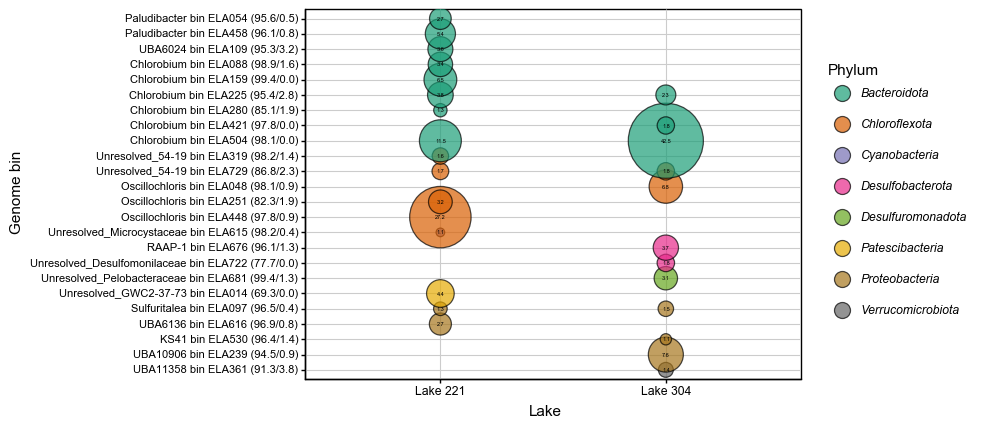

<ggplot: (-9223363255813206577)>


In [12]:
# Plot
fig3a_plot = (ggplot(plotting_data, aes(x = 'plot-id', y='genome_label'))
            + geom_point(aes(size='Relative abundance (%)_mean', fill='Phylum'), alpha=0.7)
            + geom_text(aes(label='percent_label'), size=4)
            + theme_bw()
            + theme(text=element_text(family='Arial', colour='black'),
                    line=element_line(colour='black'),
                    panel_border=element_rect(colour='black'),
                    panel_grid=element_line(colour='#cccccc'),
                    legend_key=element_blank(),
                    legend_margin=0,
                    legend_text=element_text(face='italic'),
                   axis_text_y=element_text(size=8))
            + scale_size_continuous(range=[3,30])
            + guides(size=False, fill=guide_legend(override_aes={'size':6}))
            + scale_fill_brewer(type='qualitative', palette=2)
            + ylab('Genome bin')
            + xlab('Lake'))

print(fig3a_plot)

In [13]:
fig3a_plot.save('Figure_3a_raw.pdf', width=50, height=130, units='mm')

/Analysis/jmtsuji/miniconda3_mellea/envs/jupyterlab/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 50.0 x 130.00000000000003 mm image.
/Analysis/jmtsuji/miniconda3_mellea/envs/jupyterlab/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Figure_3a_raw.pdf
/Analysis/jmtsuji/miniconda3_mellea/envs/jupyterlab/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
